In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import datasets, transforms

In [17]:
class MNISTDataset(Dataset):
    def __init__(self, root='data/', train=True, transforms=None):
        self.data = datasets.MNIST(root=root, train=train, transform=transforms, download=True)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image, label = self.data[idx]
        return image, label
    
    def get_datas(self):
        return self.data.data
    
    def get_labels(self):
        return self.data.targets.cpu().numpy()

In [18]:
train_dataset = MNISTDataset(train=True, transforms=transforms.ToTensor())
test_dataset = MNISTDataset(train=False, transforms=transforms.ToTensor())

In [19]:
class MLP(nn.Module):
    def __init__(self, num_outputs, num_hiddens):
        super().__init__()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))
        
    def forward(self, X):
        return self.net(X)

In [20]:
model = MLP(num_outputs=10, num_hiddens=256)

In [21]:
# Metrics
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
criterion = torch.nn.CrossEntropyLoss()
batch_size = 256

In [22]:
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [23]:
epochs = 10
Loss = []
acc = []

for epoch in range(epochs):
    epoch_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    Loss.append(epoch_loss / len(train_loader))
    print('Epoch: {}. Loss: {}.'.format(epoch, Loss[-1]))

Epoch: 0. Loss: 0.7746034909436044.
Epoch: 1. Loss: 0.3524915713896143.
Epoch: 2. Loss: 0.3024901917957245.
Epoch: 3. Loss: 0.2705662739879273.
Epoch: 4. Loss: 0.24537083711078828.
Epoch: 5. Loss: 0.22450326833319156.
Epoch: 6. Loss: 0.206752188915902.
Epoch: 7. Loss: 0.1913082591713743.
Epoch: 8. Loss: 0.17778964376354472.
Epoch: 9. Loss: 0.16583168988532207.


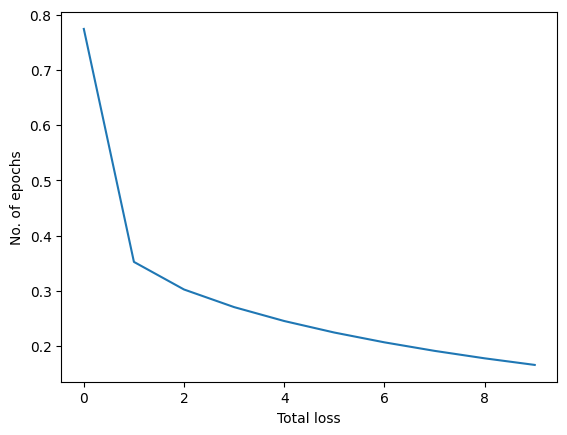

In [24]:
plt.plot(Loss)
plt.xlabel('Total loss')
plt.ylabel('No. of epochs')
plt.show()

In [25]:
def predict(model, test_dataset):
    model.eval()
    predictions = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images.view(-1, 28*28))
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted)
    return predictions

In [27]:
predictions = predict(model, test_loader)
print(predictions[:10])

[tensor(7), tensor(2), tensor(1), tensor(0), tensor(4), tensor(1), tensor(4), tensor(9), tensor(6), tensor(9)]


In [28]:
datas_test = test_dataset.get_datas()
labels_test = test_dataset.get_labels() 

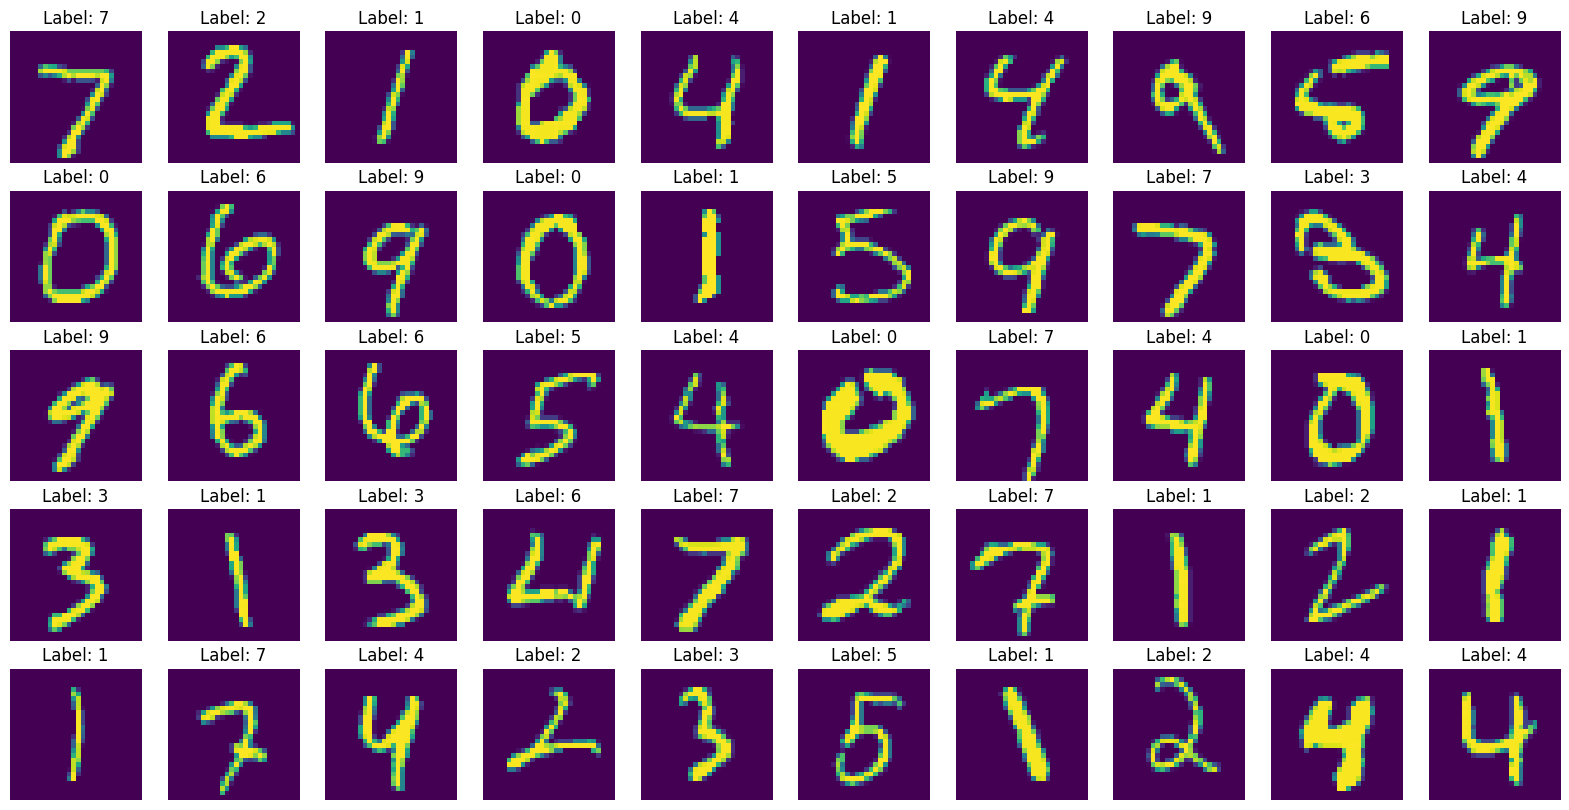

In [29]:
fig, axes = plt.subplots(5, 10, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(datas_test[i].squeeze(0))
    ax.set_title(f"Label: {predictions[i].item()}")
    ax.axis("off")

plt.show()

In [32]:
preds = np.array(predictions)
acc = float((preds == labels_test).sum()) / len(labels_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.9512
